# WSU size of computing estimate numbers (Plots for Crystal)

The goal here is to put together some numbers on the type of projects ALMA would process as part of the WSU to be used to produce a total size of computing estimate.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import re
import math
from astropy.table import Table, QTable, vstack
from importlib import reload

## Read in  WSU estimates from cycle 7 and 8 data

In [2]:
#result = Table.read('cycle7wsu_20220923.fits')
#result_c8 = Table.read('cycle8wsu_20220923.fits')
result = Table.read('cycle7wsu_20221003.fits')
result_c8 = Table.read('cycle8wsu_20221003.fits')

In [3]:
result.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','npol','velocity_resolution_current','wsu_freq','wsu_bandwidth_initial','wsu_bandwidth_final','wsu_bandwidth_spw','wsu_specwidth_finest','wsu_chanavg_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','tint','nbase_typical','nbase_array','nbase_all','wsu_nchan_final_finest','wsu_nchan_final_stepped','wsu_nchan_final_stepped2','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_initial_finest','wsu_nchan_initial_stepped','wsu_nchan_initial_stepped2','vis_rate_typical_initial_finest','vis_rate_typical_initial_stepped','vis_rate_typical_final_finest','vis_rate_typical_final_stepped','vis_rate_typical_final_stepped2','vis_rate_array_initial_finest','vis_rate_array_initial_stepped','vis_rate_array_final_finest','vis_rate_array_final_stepped','vis_rate_ar

In [4]:
len(result)

11519

In [5]:
result_c7_c8 = vstack([result,result_c8])

In [6]:
len(result_c7_c8)

22362

In [9]:
# read in original data for cycle 7 and 8
cycle7tab = Table.read('result_table_cycle7_with_calc_values_20220923.csv')
cycle8tab = Table.read('result_table_cycle8_with_calc_values_20220923.csv')

In [10]:
np.unique(cycle7tab['array'])

12m
7m
TP


In [11]:
tmp_tab = vstack([cycle7tab,cycle8tab])

In [12]:
len(tmp_tab)

101475

In [13]:
# exclude total power projects
idx = tmp_tab['array'] != ['TP']
cycle7_cycle8_tab = tmp_tab[idx]

In [14]:
len(cycle7_cycle8_tab)

96277

In [111]:
cycle7_cycle8_tab.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [15]:
np.max(cycle7_cycle8_tab['imsize'])

10440.0

In [24]:
np.sum(cycle7_cycle8_tab['imsize']<1000)/len(cycle7_cycle8_tab) 

0.9031232797033559

In [29]:
np.sum(cycle7_cycle8_tab['imsize']<1600)/len(cycle7_cycle8_tab) 

0.9514525795361302

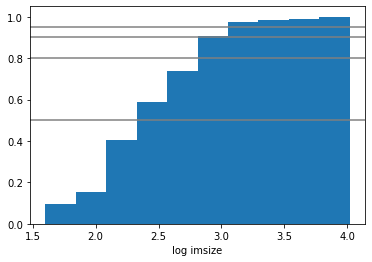

In [42]:
plt.hist(np.log10(cycle7_cycle8_tab['imsize']),cumulative=True,density=True)
plt.xlabel('log imsize')
plt.axhline(0.5,color='gray')
plt.axhline(0.8,color='gray')
plt.axhline(0.9,color='gray')
plt.axhline(0.95,color='gray')

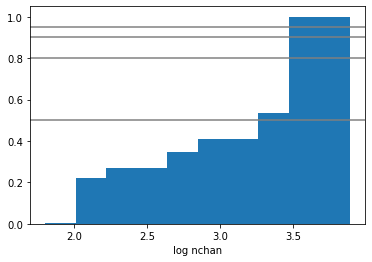

In [41]:
plt.hist(np.log10(cycle7_cycle8_tab['spw_nchan']),cumulative=True,density=True)
plt.xlabel('log nchan')
plt.axhline(0.5,color='gray')
plt.axhline(0.8,color='gray')
plt.axhline(0.9,color='gray')
plt.axhline(0.95,color='gray')

In [43]:
np.log10(2000)

3.3010299956639813

## Figuring out ncores and mitigation limit correspondance 

In [13]:
import large_cubes

In [17]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py'>

/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py:849: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(nrecs_jao) , levels=[146],colors='black', label='8 nodes/32GB')
/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py:850: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit2x_proc) , levels=[146], colors='red', label='24 nodes/32GB')
/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py:851: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit10x_proc) , levels=[146], colors='green', label='150 nodes/32GB')
/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py:852: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(log_imsize,log_nchan,np.sqrt(mit100x_proc) , levels=[146], colors='orange', label='1500 nodes/32GB')
/Users/akepley

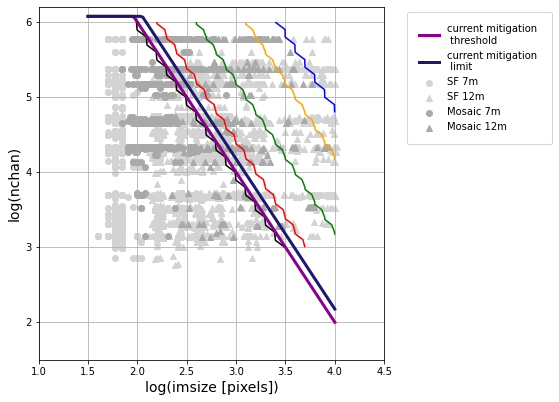

In [18]:
large_cubes.make_imsize_vs_nchan(result_c7_c8,core_theory=True,band2_specscan=False)

## Making density plots

In [68]:
import large_cubes

In [69]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py'>

In [70]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

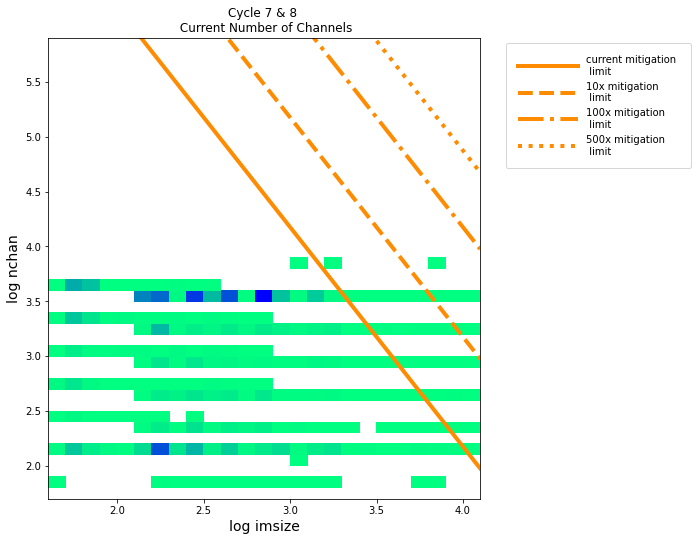

In [71]:
reload(large_cubes)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels',
                                                            cmap='winter_r',
                                                            band2_specscan=False,
                                                            mit_limits=True,
                                                            pltname='density_plot_nolines.png')

In [72]:
print("max is: ", np.nanmax(h_current))
print("min is : ", np.nanmin(h_current))

max is:  8970.0
min is :  1.0


In [73]:
reload(large_cubes)
large_cubes.calc_frac_under_lines(h_current,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

Total Number:  96277.0
Mit. limit          Max Nchan         Number Below             Number Total           % Below
  1.0                49600.0               95223.00                  96277.00             98.91

 10.0                148800.0               96189.00                  96277.00             99.91

500.0                595200.0               96277.00                  96277.00             100.00



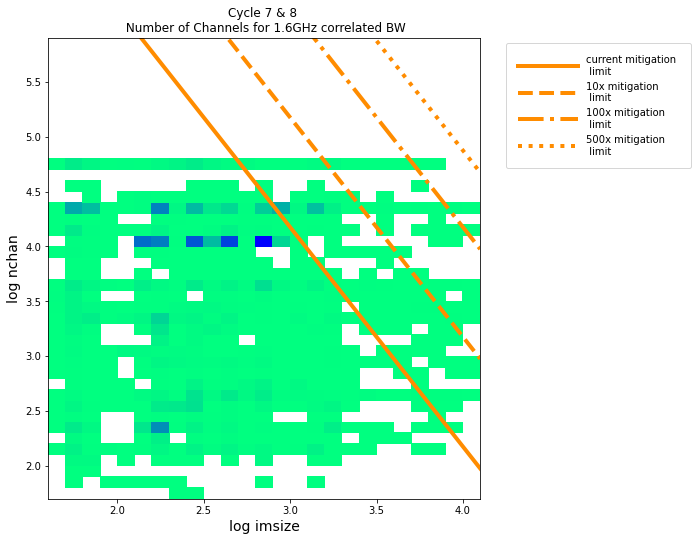

In [74]:
reload(large_cubes)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW',
                                                            cmap='winter_r',
                                                            band2_specscan=False,nspw=10,
                                                            pltname='density_plot_wsu_spw_nolines.png')

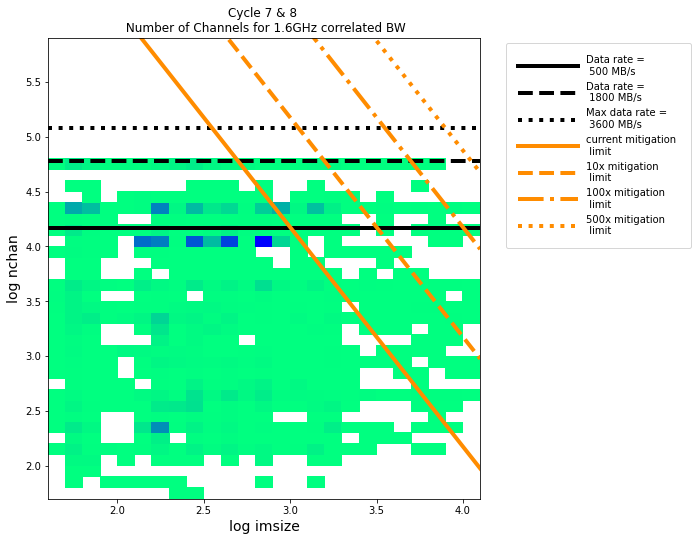

In [76]:
reload(large_cubes)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW',
                                                            cmap='winter_r', nspw=10,
                                                            pltname='density_plot_wsu_spw.png')

In [77]:
print("max is : ", np.nanmax(h_wsu_spw))
print("min is : ", np.nanmin(h_wsu_spw))

max is :  1804.0
min is :  1.0


In [78]:
nspw=10
large_cubes.calc_frac_under_lines(h_wsu_spw,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step,
                                   max_nchans = np.array([large_cubes.band2specscan_160MBs['nchan']/nspw,large_cubes.band2specscan_500MBs['nchan']/nspw,large_cubes.band2specscan['nchan']/nspw]))

Total Number:  22362.0
Mit. limit          Max Nchan         Number Below             Number Total           % Below
  1.0                 4960.0               8850.00                  22362.00             39.58

 10.0                14880.0               16778.00                  22362.00             75.03

500.0                59520.0               22362.00                  22362.00             100.00



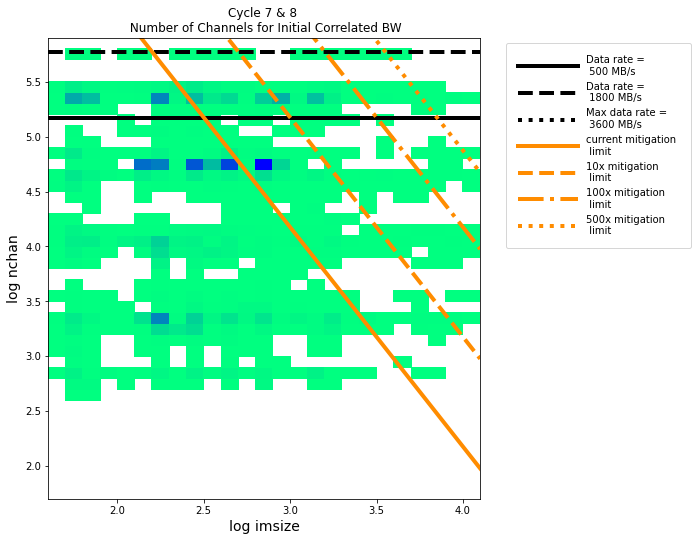

In [79]:
reload(large_cubes)
h_wsu_initial, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_initial_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for Initial Correlated BW',
                                                            cmap='winter_r', nspw=1,
                                                            pltname='density_plot_wsu_initial.png')

In [80]:
large_cubes.calc_frac_under_lines(h_wsu_initial,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

Total Number:  22362.0
Mit. limit          Max Nchan         Number Below             Number Total           % Below
  1.0                49600.0               8332.00                  22362.00             37.26

 10.0                148800.0               16749.00                  22362.00             74.90

500.0                595200.0               22336.00                  22362.00             99.88



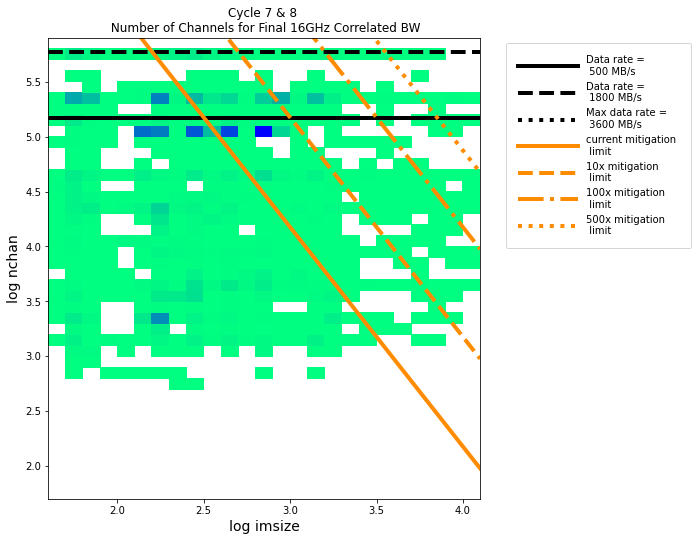

In [81]:
h_wsu_final, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_final_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for Final 16GHz Correlated BW',
                                                            cmap='winter_r',nspw=1,
                                                            pltname='density_plot_wsu_final.png')

In [82]:
reload(large_cubes)
large_cubes.calc_frac_under_lines(h_wsu_final,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

Total Number:  22362.0
Mit. limit          Max Nchan         Number Below             Number Total           % Below
  1.0                49600.0               8097.00                  22362.00             36.21

 10.0                148800.0               16542.00                  22362.00             73.97

500.0                595200.0               22329.00                  22362.00             99.85



In [83]:
large_cubes.calc_frac_under_lines(h_wsu_final,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step,
                                  mit_limits = np.array([1,10,100, 500]),
                                  max_nchans = np.array([large_cubes.band2specscan_160MBs['nchan'],large_cubes.band2specscan_500MBs['nchan'],large_cubes.band2specscan['nchan'],large_cubes.band2specscan['nchan']]))

Total Number:  22362.0
Mit. limit          Max Nchan         Number Below             Number Total           % Below
  1.0                49600.0               8097.00                  22362.00             36.21

 10.0                148800.0               16542.00                  22362.00             73.97

100.0                595200.0               22224.00                  22362.00             99.38

500.0                595200.0               22329.00                  22362.00             99.85



## making cumulative fraction plots

Limit   Number    Fraction
1 95223.0 0.98905242165834
2 95650.0 0.9934875411572858
10 96189.0 0.9990859706887418
100 96277.0 1.0
500 96277.0 1.0


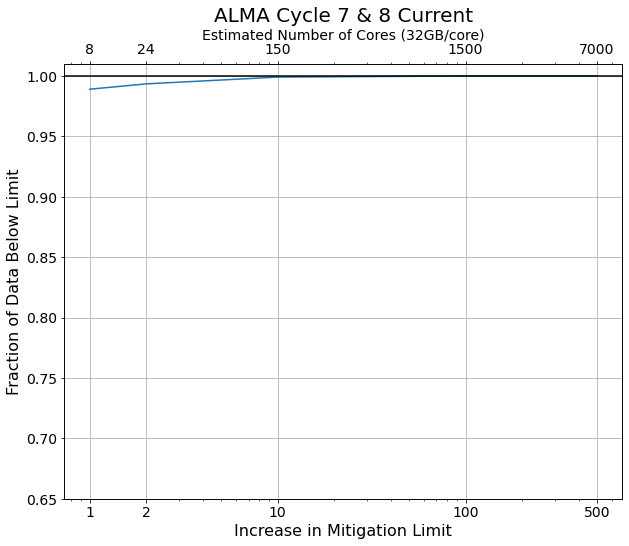

In [84]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h_current,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 Current',
                                 pltname='cumulative_current.png')

Limit   Number    Fraction
1 95223.0 0.98905242165834
2 95650.0 0.9934875411572858
10 96189.0 0.9990859706887418
100 96277.0 1.0
500 96277.0 1.0


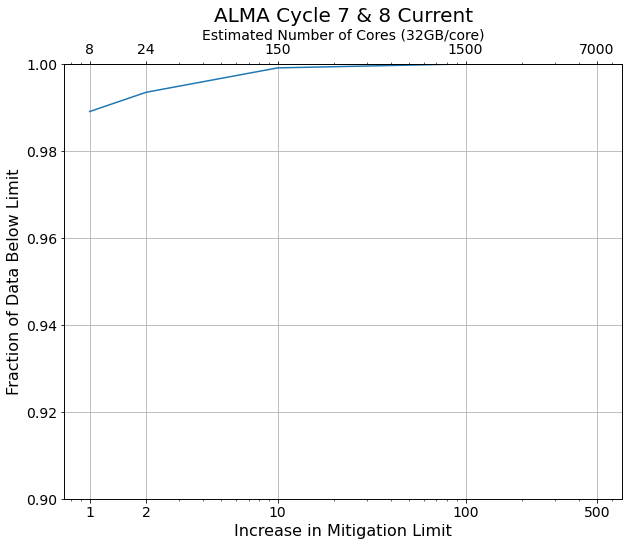

In [85]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h_current,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 Current',
                                 pltname='cumulative_current_zoom.png',
                                 ylim=(0.9,1.0))

Limit   Number    Fraction
1 21254.0 0.9504516590644844
2 21416.0 0.957696091583937
10 22224.0 0.9938288167426885
100 22359.0 0.9998658438422323
500 22362.0 1.0


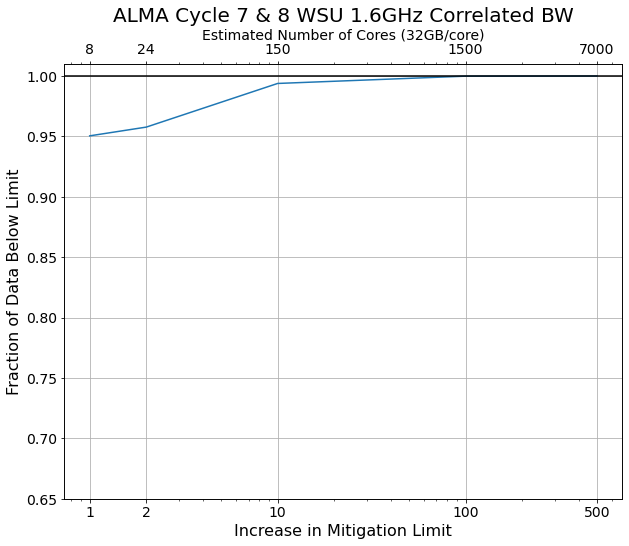

In [86]:
large_cubes.calc_cumulative_hist(h_wsu_spw,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU 1.6GHz Correlated BW',
                                 pltname = 'cumulative_wsu_spw.png')

Limit   Number    Fraction
1 21254.0 0.9504516590644844
2 21416.0 0.957696091583937
10 22224.0 0.9938288167426885
100 22359.0 0.9998658438422323
500 22362.0 1.0


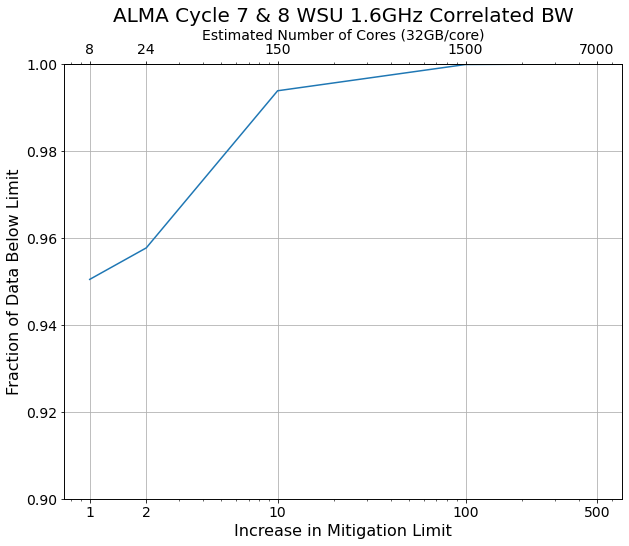

In [87]:
large_cubes.calc_cumulative_hist(h_wsu_spw,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU 1.6GHz Correlated BW',
                                 pltname = 'cumulative_wsu_spw_zoom.png',
                                 ylim=(0.9,1.0))

Limit   Number    Fraction
1 16774.0 0.7501117967981397
2 19420.0 0.8684375279491995
10 21333.0 0.953984437885699
100 22241.0 0.9945890349700385
500 22336.0 0.9988373132993471


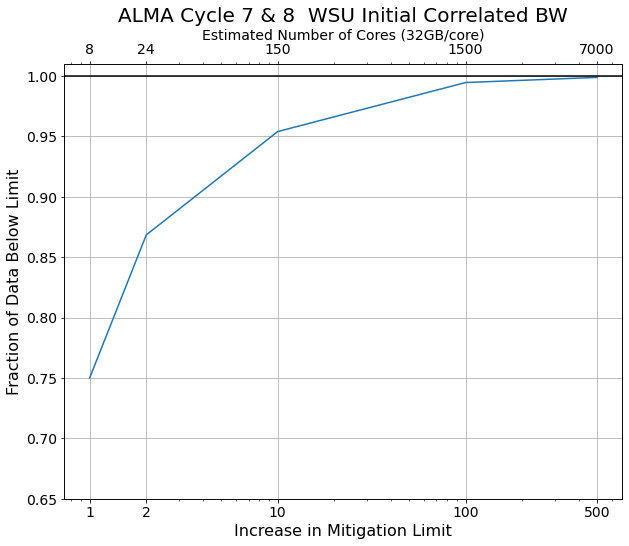

In [88]:
large_cubes.calc_cumulative_hist(h_wsu_initial,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8  WSU Initial Correlated BW',
                                pltname='cumulative_wsu_initial')

Limit   Number    Fraction
1 15114.0 0.675878722833378
2 17272.0 0.7723817189875682
10 21254.0 0.9504516590644844
100 22224.0 0.9938288167426885
500 22329.0 0.9985242822645559


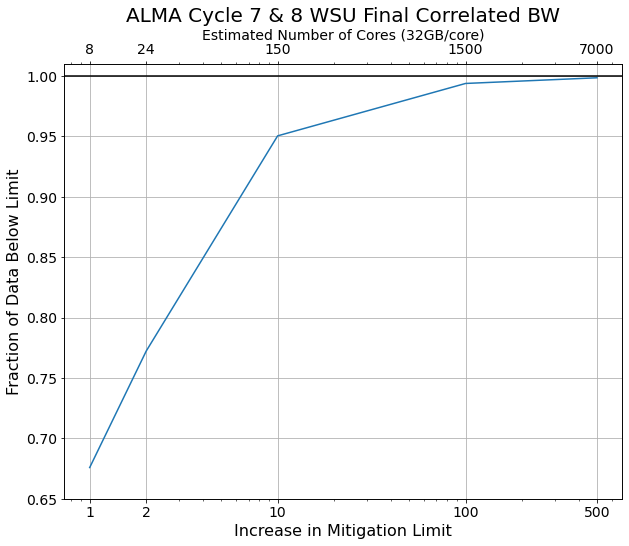

In [89]:
large_cubes.calc_cumulative_hist(h_wsu_final,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU Final Correlated BW',
                                pltname='cumulative_wsu_final.png')

## Making velocity histograms

96277
[[5.9000e+01 2.7660e+03 2.8906e+04 4.8960e+03 7.0740e+03]
 [0.0000e+00 3.9000e+01 4.8000e+01 2.5080e+03 3.5880e+03]
 [1.2000e+01 1.3500e+02 2.4100e+02 1.1300e+02 7.1100e+02]
 [1.3940e+03 9.7330e+03 1.2183e+04 2.1550e+03 1.0158e+04]
 [3.0100e+02 1.6600e+03 2.0140e+03 7.1300e+02 3.2440e+03]
 [1.6000e+01 4.2000e+01 3.1200e+02 2.5100e+02 6.7900e+02]
 [0.0000e+00 6.6000e+01 6.0000e+01 2.8000e+01 1.0800e+02]
 [0.0000e+00 3.2000e+01 1.6000e+01 0.0000e+00 1.6000e+01]]


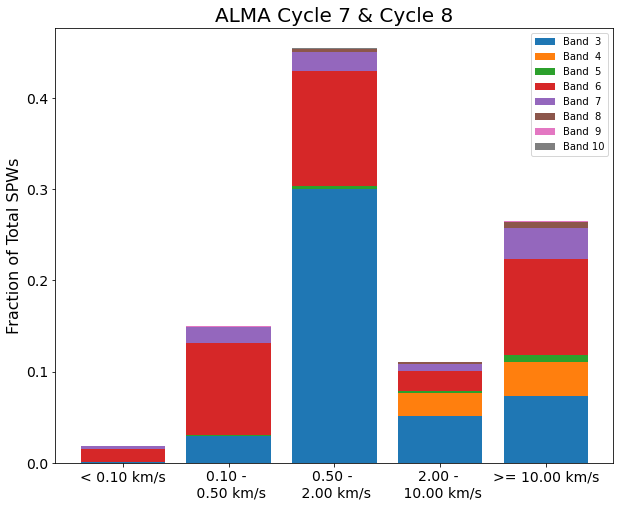

In [90]:
reload(large_cubes)
vel_hist = large_cubes.make_velocity_bar(cycle7_cycle8_tab,title='ALMA Cycle 7 & Cycle 8',pltname='cycle7_cycle8_spw_distribution.png')

In [41]:
np.sum(vel_hist,axis=0)/np.sum(vel_hist)

array([0.01850909, 0.15032666, 0.45472958, 0.11076373, 0.26567093])

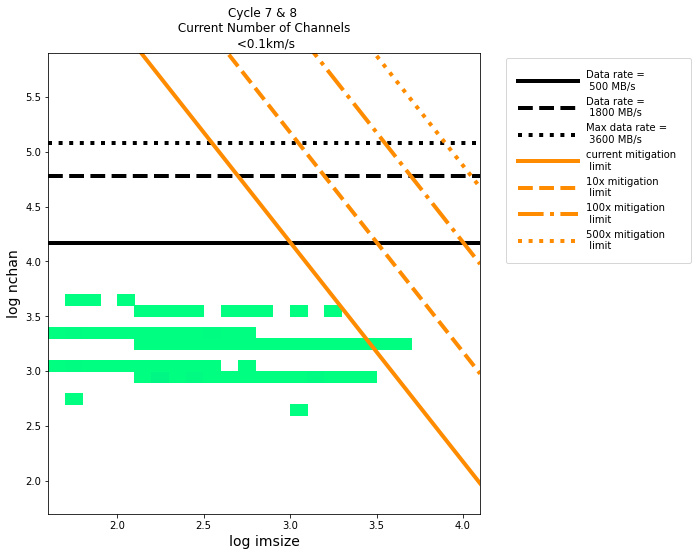

In [106]:
reload(large_cubes)
idx = cycle7_cycle8_tab['velocity_resolution'] < 0.1
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n <0.1km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True, nspw=10,
                                                            pltname='density_plot_current_lt_01kms.png',
                                                            vmin=1,
                                                            vmax=8970)

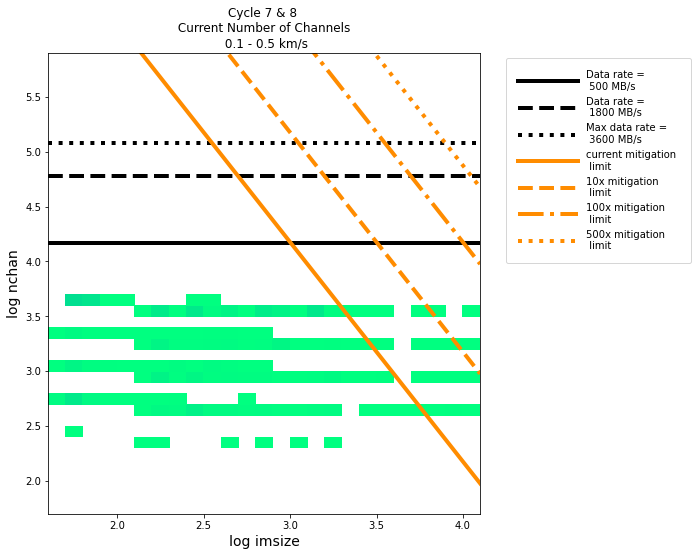

In [107]:
reload(large_cubes)
idx = (cycle7_cycle8_tab['velocity_resolution'] < 0.5) & (cycle7_cycle8_tab['velocity_resolution'] >= 0.1)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 0.1 - 0.5 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_01_kms_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=8970)

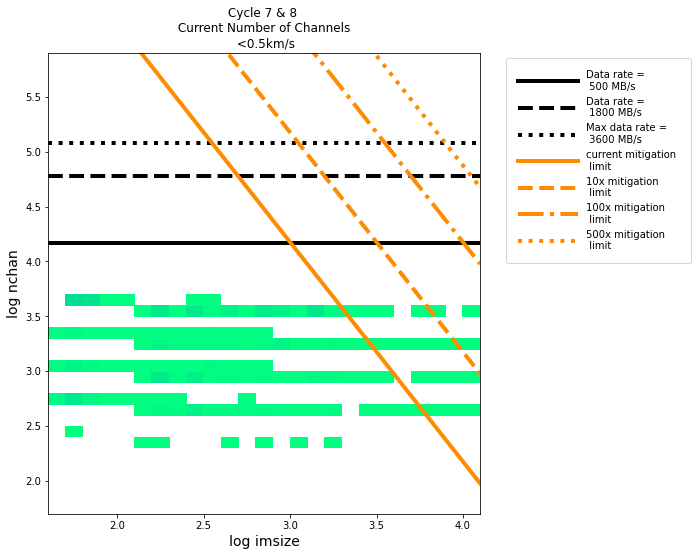

In [108]:
reload(large_cubes)
idx = cycle7_cycle8_tab['velocity_resolution'] < 0.5
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n <0.5km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=8970)

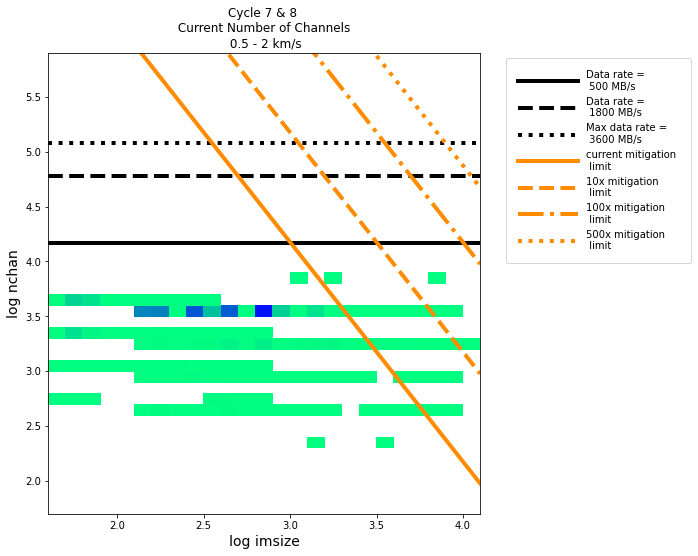

In [109]:
idx = (cycle7_cycle8_tab['velocity_resolution'] >= 0.5) & (cycle7_cycle8_tab['velocity_resolution'] < 2.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 0.5 - 2 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_05kms_lt_2kms.png',
                                                            vmin=1,
                                                            vmax=8970)

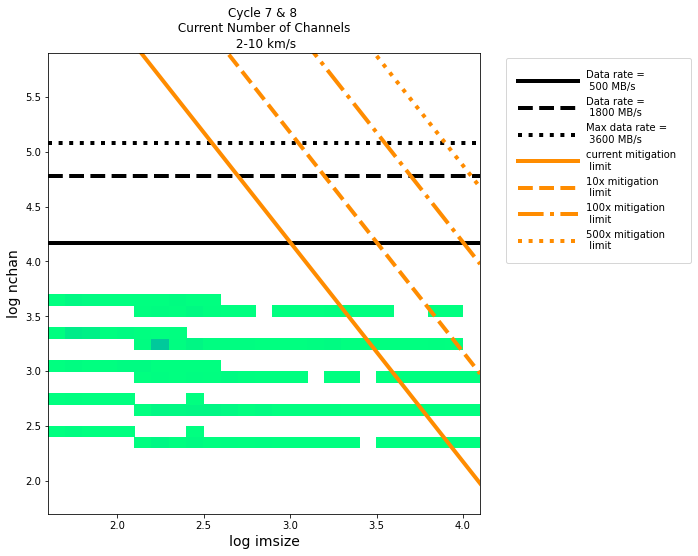

In [110]:
idx = (cycle7_cycle8_tab['velocity_resolution'] >= 2.0) & (cycle7_cycle8_tab['velocity_resolution'] < 10.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 2-10 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_2kms_lt_10kms.png',
                                                            vmin=1,
                                                            vmax=8970)

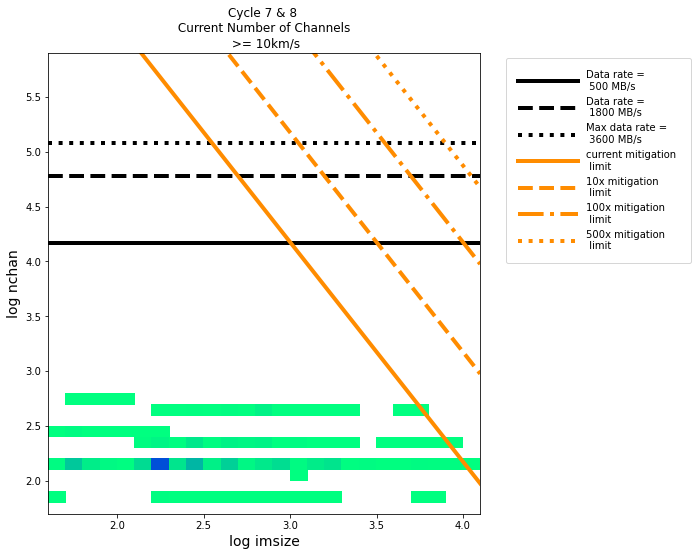

In [111]:
idx =  (cycle7_cycle8_tab['velocity_resolution'] >= 10.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n >= 10km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_10kms.png',
                                                            vmin=1,
                                                            vmax=8970)

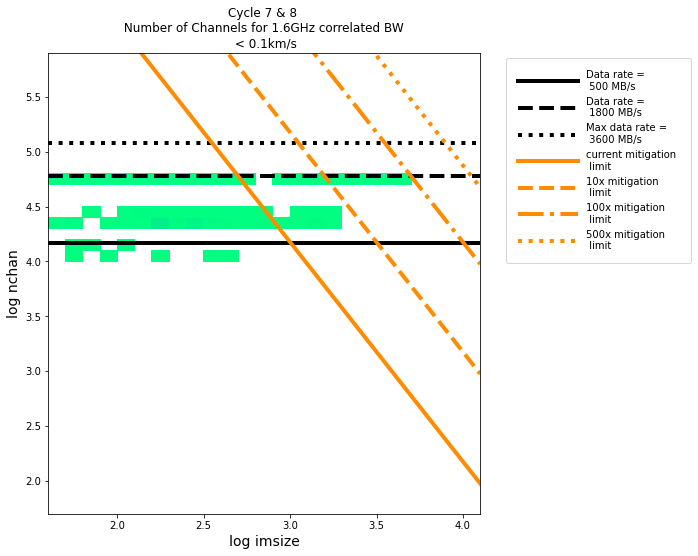

In [112]:
reload(large_cubes)
idx = result_c7_c8['velocity_resolution_current'] < 0.1
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n < 0.1km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_01kms.png',
                                                            vmin=1,
                                                            vmax=1804)

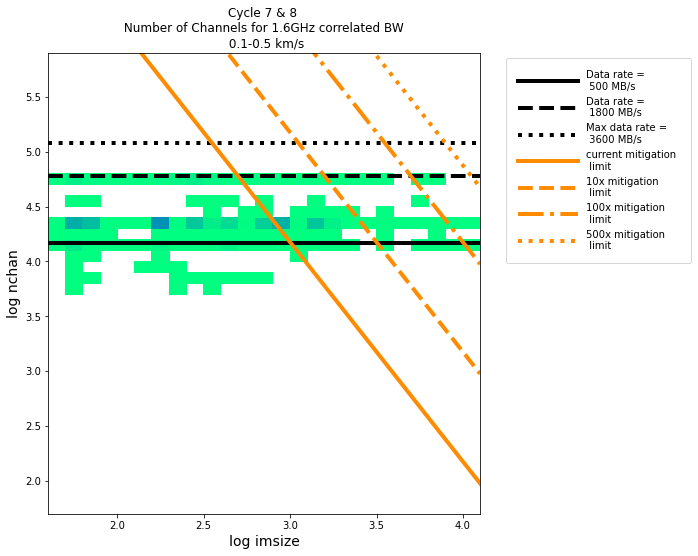

In [113]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] < 0.5) & (result_c7_c8['velocity_resolution_current'] >= 0.1)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 0.1-0.5 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_05kms_gt_01kms.png',
                                                            vmin=1,
                                                            vmax=1804)

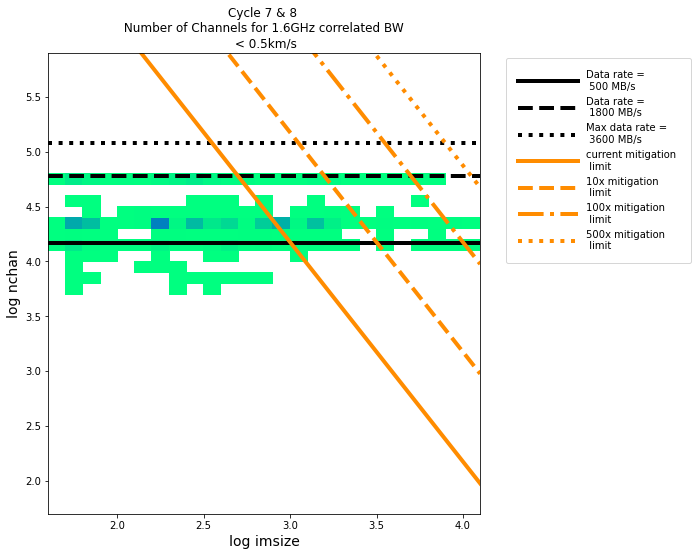

In [114]:
reload(large_cubes)
idx = result_c7_c8['velocity_resolution_current'] < 0.5
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n < 0.5km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=1804)

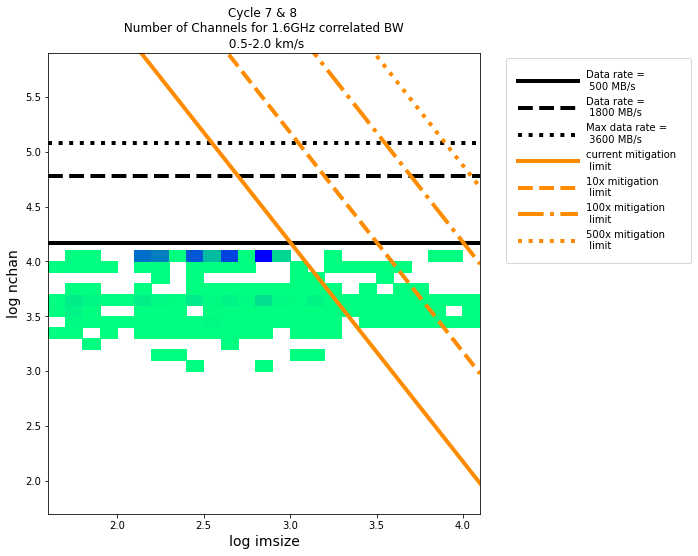

In [115]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 0.5) & (result_c7_c8['velocity_resolution_current'] < 2.0)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 0.5-2.0 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_gt_05kms_lt_2kms.png',
                                                            vmin=1,
                                                            vmax=1804)

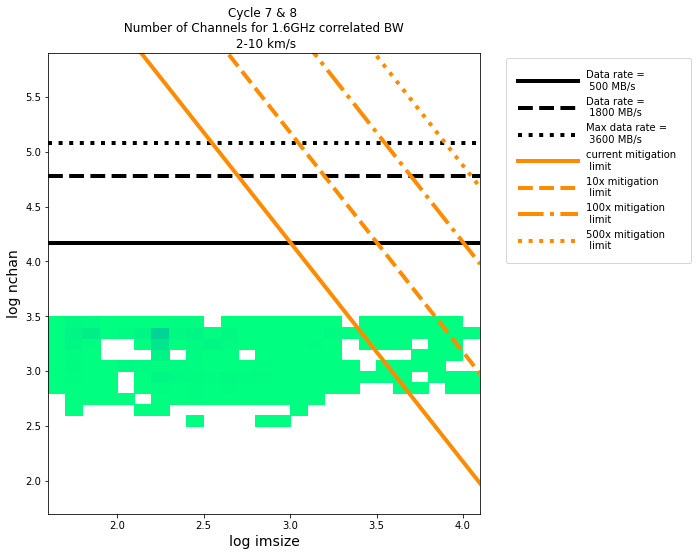

In [116]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 2) & (result_c7_c8['velocity_resolution_current'] < 10.0)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 2-10 km/s',
                                                            cmap='winter_r',
                                                            pltname='density_plot_wsu_spw_gt_2kms_lt_10kms.png',
                                                            vmin=1,
                                                            vmax=1804)

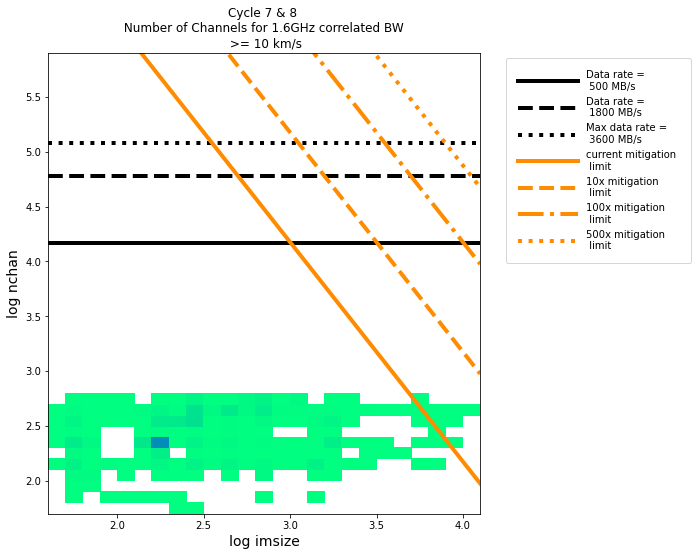

In [117]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 10.0) 
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n >= 10 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_gte_10kms.png',
                                                            vmin=1,
                                                            vmax=1804)

## Estimated the fraction of projects that would fail mitigation completely

In [56]:
idx = (cycle7_cycle8_tab['spw_nchan'] > 3500) & (cycle7_cycle8_tab['points_per_fov'] > 5.8e5)
len(cycle7_cycle8_tab[idx])

96

In [57]:
np.unique(cycle7_cycle8_tab[idx]['member_ous_uid'])

uid://A001/X1465/X16f8
uid://A001/X1465/X1aba
uid://A001/X1465/X1ac2
uid://A001/X1465/X1aca
uid://A001/X1465/X1ad2
uid://A001/X1465/X1ada
uid://A001/X1465/X1b10
uid://A001/X1465/X1ef
uid://A001/X1465/X2a7e
uid://A001/X1465/X2a84
uid://A001/X1465/X2b39


In [58]:
idx = (cycle7_cycle8_tab['spw_nchan'] > 1900) & (cycle7_cycle8_tab['points_per_fov'] > 1.0e6)
len(cycle7_cycle8_tab[idx])

191

In [59]:
np.unique(cycle7_cycle8_tab[idx]['member_ous_uid'])

uid://A001/X1465/X16f8
uid://A001/X1465/X186d
uid://A001/X1465/X1871
uid://A001/X1465/X1875
uid://A001/X1465/X1a15
uid://A001/X1465/X1a19
uid://A001/X1465/X1aba
uid://A001/X1465/X1ac2
uid://A001/X1465/X1aca
uid://A001/X1465/X1ad2
uid://A001/X1465/X1ada


In [60]:
np.unique(cycle7_cycle8_tab['member_ous_uid'])

uid://A001/X1465/X1002
uid://A001/X1465/X1008
uid://A001/X1465/X100e
uid://A001/X1465/X1014
uid://A001/X1465/X101a
uid://A001/X1465/X1020
uid://A001/X1465/X1026
uid://A001/X1465/X102c
uid://A001/X1465/X1032
uid://A001/X1465/X1038
uid://A001/X1465/X103e


In [61]:
(51+30)/5200.0

0.015576923076923077

In [62]:
cycle7_cycle8_tab.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [63]:
cycle7_cycle8_tab['is_mosaic']

T
T
T
T
T
T
T
T
F
F
F


In [118]:
result_c7_c8.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','npol','velocity_resolution_current','wsu_freq','wsu_bandwidth_initial','wsu_bandwidth_final','wsu_bandwidth_spw','wsu_specwidth_finest','wsu_chanavg_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','tint','nbase_typical','nbase_array','nbase_all','wsu_nchan_final_finest','wsu_nchan_final_stepped','wsu_nchan_final_stepped2','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_initial_finest','wsu_nchan_initial_stepped','wsu_nchan_initial_stepped2','vis_rate_typical_initial_finest','vis_rate_typical_initial_stepped','vis_rate_typical_final_finest','vis_rate_typical_final_stepped','vis_rate_array_initial_finest','vis_rate_array_initial_stepped','vis_rate_array_final_finest','vis_rate_array_final_stepped','vis_rate_all_initial_finest','vis_rate_all_in

In [136]:
np.min(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

1.8726190476190478e-05

In [135]:
np.max(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

2.243384

In [139]:
np.median(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

0.22433764285714286

In [140]:
result_c7_c8['vis_rate_array_final_stepped2']

2.4832028571428575
2.280488571428571
2.280488571428571
2.280488571428571
2.280488571428571
2.280488571428571
2.280488571428571
2.280488571428571
3.6046371428571424
3.6046371428571424
3.6046371428571424


In [44]:
result_c7_c8['mous'][10]

'uid://A001/X1465/X103e'

In [45]:
result_c7_c8[10]

mous,proposal_id,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,npol,velocity_resolution_current,wsu_freq,wsu_bandwidth_initial,wsu_bandwidth_final,wsu_bandwidth_spw,wsu_specwidth_finest,wsu_chanavg_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,tint,nbase_typical,nbase_array,nbase_all,wsu_nchan_final_finest,wsu_nchan_final_stepped,wsu_nchan_final_stepped2,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_nchan_initial_finest,wsu_nchan_initial_stepped,wsu_nchan_initial_stepped2,vis_rate_typical_initial_finest,vis_rate_typical_initial_stepped,vis_rate_typical_final_finest,vis_rate_typical_final_stepped,vis_rate_typical_final_stepped2,vis_rate_array_initial_finest,vis_rate_array_initial_stepped,vis_rate_array_final_finest,vis_rate_array_final_stepped,vis_rate_array_final_stepped2,vis_rate_all_initial_finest,vis_rate_all_initial_stepped,vis_rate_all_final_finest,vis_rate_all_final_stepped,frac_bw_initial,frac_bw_final
,,,,,,,,deg,arcsec,,,,,,km / s,GHz,GHz,GHz,GHz,kHz,,kHz,,kHz,,s,,,,,,,,,,,,,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,1 / h,,
bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,bytes32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
uid://A001/X1465/X103e,2019.1.01326.S,7m,10.0,12.0,16.0,6.0,1.0,0.09537148607236658,4.718358833986751,T,390.0,39.372870359257995,0.9436717667973502,2.0,1.2917390499338628,253.98758071410998,16.0,16.0,1.6,1120.5,83.0,837.0,62.0,418.5,31.0,10.08,45.0,66.0,120.0,14279.0,19115.0,38231.0,1427.0,1911.0,3823.0,14279.0,19115.0,38231.0,0.9179357142857142,1.2288214285714285,0.9179357142857142,1.2288214285714285,2.457707142857143,1.3463057142857144,1.8022714285714285,1.3463057142857144,1.8022714285714285,3.6046371428571424,2.4478285714285715,3.2768571428571427,2.4478285714285715,3.2768571428571427,0.06299520612391557,0.06299520612391557
